___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

# Learning and predicting

To make predictions about the data, we need to have a model that can be applied to the data. In scikit-learn, models are called estimators.

So, we need to choose an estimator class, import the class, and instantiate the estimator.

Then, we need to choose the model hyperparameters by instantiating the estimator with desired values.

Finally, we need to fit the model to the data by calling the `fit()` method of the model instance.

And, we'll be ready to predict new values with the `predict()` method of the model instance.

In [1]:
# inline plotting instead of popping out
%matplotlib inline

# import the necessary modules from the packages
# datasets: to load the data
# svm: the estimator
from sklearn import datasets, svm

# import matplotlib to plot the images
import matplotlib.pyplot as plt

## Loading an example dataset

In [2]:
# Load the digits dataset
digits = datasets.load_digits()

# check the shape of the data
digits.data.shape

(1797, 64)

An example of an estimator is the class `sklearn.svm.SVC` that implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model but, **for the time being we will consider the estimator as a black box**.

In [3]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001, C=100.)

We call our estimator instance `clf`, as it is a classifier. 

The model must now be fitted to data, that is, it must "learn the model". This is done by passing our training set to the fit method. 

As a training set, let us use all the images of our dataset apart from the last five ones. We select this training set with the `[:-5]` Python syntax, which produces a new array that contains all but the last entry of digits.data (latter we'll see who to do this the right way)

In [4]:
# Note this is not the right way to do it, but it is just to show the idea

# set the training set - note that the last five images are not used
training_set_X = digits.data[:-5]
training_set_y = digits.target[:-5]

# set the validation set
validation_set_X = digits.data[-5:]
validation_set_y = digits.target[-5:]

And now it is posible to fit the model to the data (kind of a convenction, usually models have the `fit` method)

In [5]:
clf.fit(training_set_X, training_set_y)

SVC(C=100.0, gamma=0.001)

So, what does the classifier predicts for the last five images?

In [6]:
clf.predict(validation_set_X)

array([9, 0, 8, 9, 8])

And the real values is 

In [7]:
validation_set_y

array([9, 0, 8, 9, 8])

Good... heim? What do you think...?

In [8]:
m, n = digits.data.shape
for image in digits.data[-5:]:
    image = image.reshape((8,8))
    print(image)

[[ 0.  0.  4. 10. 13.  6.  0.  0.]
 [ 0.  1. 16. 14. 12. 16.  3.  0.]
 [ 0.  4. 16.  6.  3. 16.  4.  0.]
 [ 0.  0. 12. 16. 16. 16.  5.  0.]
 [ 0.  0.  0.  4.  4. 16.  8.  0.]
 [ 0.  0.  0.  0.  0. 15.  5.  0.]
 [ 0.  0.  5.  7.  7. 16.  4.  0.]
 [ 0.  0.  2. 14. 15.  9.  0.  0.]]
[[ 0.  0.  6. 16. 13. 11.  1.  0.]
 [ 0.  0. 16. 15. 12. 16.  1.  0.]
 [ 0.  3. 16.  7.  0. 13.  6.  0.]
 [ 0.  4. 16.  0.  0. 10.  8.  0.]
 [ 0.  8. 16.  0.  0. 14.  6.  0.]
 [ 0.  5. 16.  7.  9. 16.  5.  0.]
 [ 0.  1. 15. 16. 16. 16.  1.  0.]
 [ 0.  0.  6. 16. 14.  6.  0.  0.]]
[[ 0.  0.  1. 11. 15.  1.  0.  0.]
 [ 0.  0. 13. 16.  8.  2.  1.  0.]
 [ 0.  0. 16. 15. 10. 16.  5.  0.]
 [ 0.  0.  8. 16. 16.  7.  0.  0.]
 [ 0.  0.  9. 16. 16.  4.  0.  0.]
 [ 0.  0. 16. 14. 16. 15.  0.  0.]
 [ 0.  0. 15. 15. 15. 16.  0.  0.]
 [ 0.  0.  2.  9. 13.  6.  0.  0.]]
[[ 0.  0.  2. 10.  7.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 15.  1.  0.]
 [ 0.  4. 16.  7.  3. 16.  7.  0.]
 [ 0.  5. 16. 10.  7. 16.  4.  0.]
 [ 0.  0.  5. 14.

We can improve the visualization...

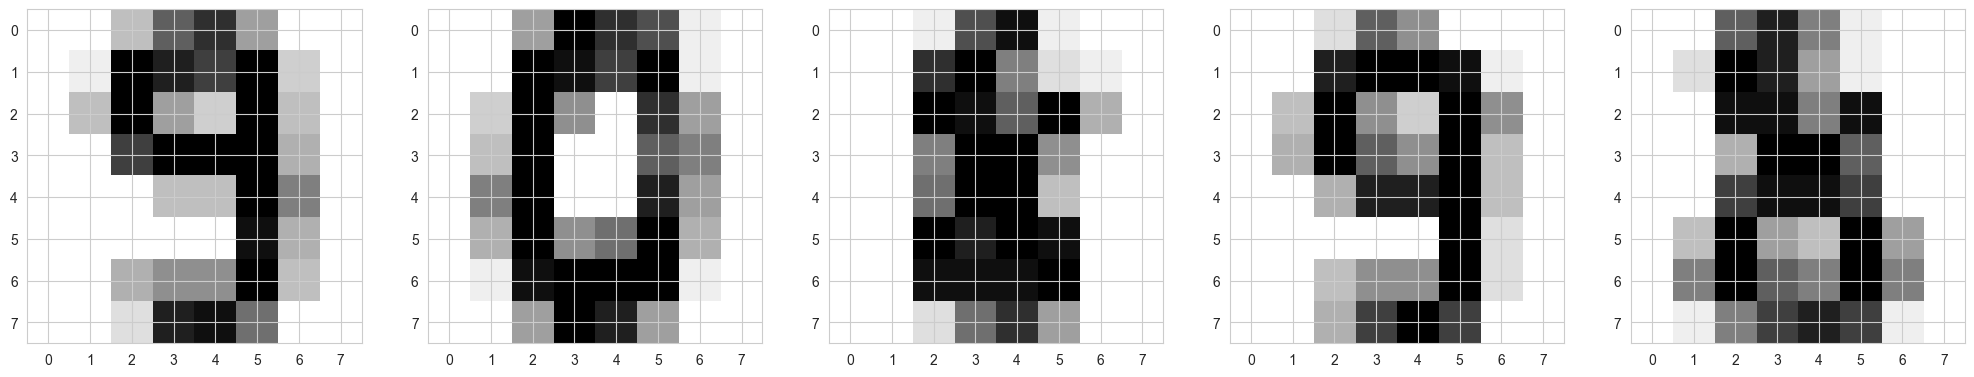

[9 0 8 9 8]


In [9]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
for i, image in enumerate(digits.data[-5:]):
    image = image.reshape((8,8))
    ax[i].imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# to recall
print(digits.target[m-5:])


# The ML flow

So, the ML flow is:
- Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
- Choose model hyperparameters by instantiating this class with desired values.
- Arrange data into a features matrix and target vector.
- Fit the model to your data by calling the `fit()` method of the model instance.
- Apply the Model to new data using the `predict()` method.


Other steps can be added, such as:
- Transform data using operations such as scaling, encoding, or imputation of missing values.
- Evaluate the model's performance.
- Tune hyperparameters.
- Deploy the model to production.

We'll see some of these steps in the next classes.

This can be transleted into a sklearn pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [11]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

pipe.fit(training_set_X, training_set_y)

pipe.predict(validation_set_X)


array([9, 0, 8, 9, 8])